In [ ]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats

#Loading data - NPRI_Data_for_review

df = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for review.csv')

#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', 100)


In [ ]:
#Observing Data
df2 = df.copy()
df2.head()


,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,Longitude,ProvinceEn,Detail_UnitType_NameEn,NAICSPrimary,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022,Number of employees
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021.0,22.63,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020.0,16.67,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
2,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021.0,15.94,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
3,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020.0,13.25,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
4,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021.0,12.48,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0


In [ ]:
df.shape

(121028, 18)

In [ ]:
df.reset_index(drop =True) #avoid the old index to confirm for correct squences

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,Longitude,ProvinceEn,Detail_UnitType_NameEn,NAICSPrimary,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022,Number of employees
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021.0,22.6300,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020.0,16.6700,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
2,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021.0,15.9400,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
3,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020.0,13.2500,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
4,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021.0,12.4800,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999.0,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121023,2776,Chevron Canada Limited,Burnaby Refinery,2016.0,0.0005,108-88-3,Toluene,Off-site Transfers for Treatment Prior to Fina...,Municipal Sewage Treatment Plant,49.288690,-123.005750,British Columbia,tonnes,324110.0,Petroleum refineries,NaN,NaN,280.0
121024,7809,Chevron Canada Limited,Hatch Point Terminal,2015.0,0.0005,110-54-3,n-Hexane,Off-site Transfers for Recycling,Recovery of Organic Substances (not solvents),48.695100,-123.544400,British Columbia,tonnes,412110.0,Petroleum and petroleum products merchant whol...,NaN,NaN,6.0
121025,2776,Chevron Canada Limited,Burnaby Refinery,2016.0,0.0004,100-41-4,Ethylbenzene,Off-site Transfers for Treatment Prior to Fina...,Municipal Sewage Treatment Plant,49.288690,-123.005750,British Columbia,tonnes,324110.0,Petroleum refineries,NaN,NaN,280.0
121026,2776,Chevron Canada Limited,Burnaby Refinery,2016.0,0.0004,71-43-2,Benzene,Off-site Transfers for Treatment Prior to Fina...,Municipal Sewage Treatment Plant,49.288690,-123.005750,British Columbia,tonnes,324110.0,Petroleum refineries,NaN,NaN,280.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

mixed_cols = ['Company name','FacilityName','Cas','Detail_NPRI_SubstanceInfo_NameEn','Group','Category','ProvinceEn','Detail_UnitType_NameEn','NAICSTitleEn','Substance comments by category for 2022','Substance comments for disposals and all media for 2022']

df[mixed_cols] = df[mixed_cols].astype(str)
df[mixed_cols] = df[mixed_cols].apply(preprocessing.LabelEncoder().fit_transform)

df2 = df.copy()
df2.head()



,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,Longitude,ProvinceEn,Detail_UnitType_NameEn,NAICSPrimary,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022,Number of employees
0,28940,0,2681,2021.0,22.63,193,179,4,25,45.869119,-72.530779,10,4,321999.0,16,1088,1,170.0
1,28940,0,2681,2020.0,16.67,193,179,4,25,45.869119,-72.530779,10,4,321999.0,16,1088,1,170.0
2,28940,0,2681,2021.0,15.94,87,54,4,25,45.869119,-72.530779,10,4,321999.0,16,1088,1,170.0
3,28940,0,2681,2020.0,13.25,87,54,4,25,45.869119,-72.530779,10,4,321999.0,16,1088,1,170.0
4,28940,0,2681,2021.0,12.48,194,144,4,25,45.869119,-72.530779,10,4,321999.0,16,1088,1,170.0


In [ ]:
df2.isnull().sum()

NpriID                                                       0
Company name                                                 0
FacilityName                                                 0
NPRI_Report_ReportYear                                       1
Quantity                                                   161
Cas                                                          0
Detail_NPRI_SubstanceInfo_NameEn                             0
Group                                                        0
Category                                                     0
Latitude                                                     1
Longitude                                                    1
ProvinceEn                                                   0
Detail_UnitType_NameEn                                       0
NAICSPrimary                                                 1
NAICSTitleEn                                                 0
Substance comments by category for 2022                

In [ ]:
df2.shape

(121028, 18)

In [ ]:
#using imputer for NaN values
df2 =df.copy()
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NaN,strategy= 'mean')
df2.mean()

NpriID                                                      14441.640273
Company name                                                  484.372558
FacilityName                                                 2215.935205
NPRI_Report_ReportYear                                       2018.467780
Quantity                                                     1697.641561
Cas                                                           136.881515
Detail_NPRI_SubstanceInfo_NameEn                              132.881730
Group                                                           3.778795
Category                                                       19.267624
Latitude                                                       51.371787
Longitude                                                    -103.430039
ProvinceEn                                                      3.455746
Detail_UnitType_NameEn                                          3.748182
NAICSPrimary                                       

In [ ]:
df2 = df.copy()
df2.replace(['000'],['NaN'],inplace = True)

In [ ]:
df2 = df.copy()

df2.replace([' '],['NaN'],inplace = True)

In [ ]:
df = df.fillna(df.mean())
df2 =df.copy()
df2

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,Longitude,ProvinceEn,Detail_UnitType_NameEn,NAICSPrimary,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022,Number of employees
0,28940,0,2681,2021.00000,22.630000,193,179,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
1,28940,0,2681,2020.00000,16.670000,193,179,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
2,28940,0,2681,2021.00000,15.940000,87,54,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
3,28940,0,2681,2020.00000,13.250000,87,54,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
4,28940,0,2681,2021.00000,12.480000,194,144,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121023,2776,762,1129,2016.00000,0.000500,16,176,2,10,49.288690,-123.005750,1,4,324110.000000,146,1088,1,280.000000
121024,7809,762,2288,2015.00000,0.000500,21,193,1,19,48.695100,-123.544400,1,4,412110.000000,145,1088,1,6.000000
121025,2776,762,1129,2016.00000,0.000400,0,90,2,10,49.288690,-123.005750,1,4,324110.000000,146,1088,1,280.000000
121026,2776,762,1129,2016.00000,0.000400,105,32,2,10,49.288690,-123.005750,1,4,324110.000000,146,1088,1,280.000000


In [ ]:
df2.isnull().sum()

NpriID                                                     0
Company name                                               0
FacilityName                                               0
NPRI_Report_ReportYear                                     0
Quantity                                                   0
Cas                                                        0
Detail_NPRI_SubstanceInfo_NameEn                           0
Group                                                      0
Category                                                   0
Latitude                                                   0
Longitude                                                  0
ProvinceEn                                                 0
Detail_UnitType_NameEn                                     0
NAICSPrimary                                               0
NAICSTitleEn                                               0
Substance comments by category for 2022                    0
Substance comments for d

In [ ]:
#The effects of outliers and scalers on visualization
 # Box Plot
#import seaborn as sns
#import matplotlib.pyplot as plt

#df2 = df
#column_name =df2.columns
#for column in ['Quantity', 'NAICSPrimary']:
 #   plt.figure()  # Create a new figure for each boxplot

  #  sns.boxplot(x= df2[column])
   # plt.show()


In [ ]:
#Remove outliers from numeric columns only
#from sklearn.preprocessing import QuantileTransformer

# Load the dataset
#df = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for review.csv')

# Select numeric columns
#numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply QuantileTransformer to normalize the data
#transformer = QuantileTransformer()
#df[numeric_cols] = transformer.fit_transform(df[numeric_cols])

# Print the transformed data
#print(df)
#df.shape


In [ ]:
# Removing outliers using IQR
#for col in df2.select_dtypes(include='object'):
  #  df2[col] = pd.to_numeric(df2[col], errors='coerce')

#Q1 = df2.quantile(0.25)
#Q3 = df2.quantile(0.75)
#IQR = Q3 - Q1

# Removing Outliers in Data
#df2_removed_outliers = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Resetting the index
#df2_removed_outliers.reset_index(drop=True, inplace=True)

# Displaying the first few rows of the filtered data
#df2_removed_outliers.head()



# Print the new shape of the DataFrame
#print("New Shape: ", df2.shape)
#print("New df:", df2)
#df2 = "New df",df2.copy()


Feature extraction,dimension reduction,feature selection are usefu to create efficeint model with high generalization capability (utilize informative and distinictive set of features)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
cols = ['Company name','FacilityName','Cas','Detail_NPRI_SubstanceInfo_NameEn','Group',	'Category','ProvinceEn','Detail_UnitType_NameEn','NAICSTitleEn']

df[cols] = df[cols].apply(preprocessing.LabelEncoder().fit_transform)
df2 =df.copy()
df2

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,Longitude,ProvinceEn,Detail_UnitType_NameEn,NAICSPrimary,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022,Number of employees
0,28940,0,2681,2021.00000,22.630000,193,179,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
1,28940,0,2681,2020.00000,16.670000,193,179,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
2,28940,0,2681,2021.00000,15.940000,87,54,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
3,28940,0,2681,2020.00000,13.250000,87,54,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
4,28940,0,2681,2021.00000,12.480000,194,144,4,25,45.869119,-72.530779,10,4,321999.000000,16,1088,1,170.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121023,2776,762,1129,2016.00000,0.000500,16,176,2,10,49.288690,-123.005750,1,4,324110.000000,146,1088,1,280.000000
121024,7809,762,2288,2015.00000,0.000500,21,193,1,19,48.695100,-123.544400,1,4,412110.000000,145,1088,1,6.000000
121025,2776,762,1129,2016.00000,0.000400,0,90,2,10,49.288690,-123.005750,1,4,324110.000000,146,1088,1,280.000000
121026,2776,762,1129,2016.00000,0.000400,105,32,2,10,49.288690,-123.005750,1,4,324110.000000,146,1088,1,280.000000


In [ ]:
df.isnull().sum()

NpriID                                                     0
Company name                                               0
FacilityName                                               0
NPRI_Report_ReportYear                                     0
Quantity                                                   0
Cas                                                        0
Detail_NPRI_SubstanceInfo_NameEn                           0
Group                                                      0
Category                                                   0
Latitude                                                   0
Longitude                                                  0
ProvinceEn                                                 0
Detail_UnitType_NameEn                                     0
NAICSPrimary                                               0
NAICSTitleEn                                               0
Substance comments by category for 2022                    0
Substance comments for d

In [ ]:
#Drop uninformative features
df2 = df.copy()
df2.drop(columns = ['NpriID','Cas','Latitude','Longitude','NAICSPrimary','NAICSTitleEn','Number of employees','Substance comments by category for 2022','Substance comments for disposals and all media for 2022'], axis=1,inplace=True)
#len(df2.columns)
df2


,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,ProvinceEn,Detail_UnitType_NameEn
0,0,2681,2021.00000,22.630000,179,4,25,10,4
1,0,2681,2020.00000,16.670000,179,4,25,10,4
2,0,2681,2021.00000,15.940000,54,4,25,10,4
3,0,2681,2020.00000,13.250000,54,4,25,10,4
4,0,2681,2021.00000,12.480000,144,4,25,10,4
...,...,...,...,...,...,...,...,...,...
121023,762,1129,2016.00000,0.000500,176,2,10,1,4
121024,762,2288,2015.00000,0.000500,193,1,19,1,4
121025,762,1129,2016.00000,0.000400,90,2,10,1,4
121026,762,1129,2016.00000,0.000400,32,2,10,1,4


In [ ]:
df2.isnull().sum()

Company name                        0
FacilityName                        0
NPRI_Report_ReportYear              0
Quantity                            0
Detail_NPRI_SubstanceInfo_NameEn    0
Group                               0
Category                            0
ProvinceEn                          0
Detail_UnitType_NameEn              0
dtype: int64

In [ ]:
df2["Quantity"] = df2["Quantity"].fillna(df2["Quantity"].mean())
df2.isnull().sum()

Company name                        0
FacilityName                        0
NPRI_Report_ReportYear              0
Quantity                            0
Detail_NPRI_SubstanceInfo_NameEn    0
Group                               0
Category                            0
ProvinceEn                          0
Detail_UnitType_NameEn              0
dtype: int64

In [ ]:
df2
df2 = df2.copy(deep = True)

Axes(0.125,0.11;0.775x0.77)


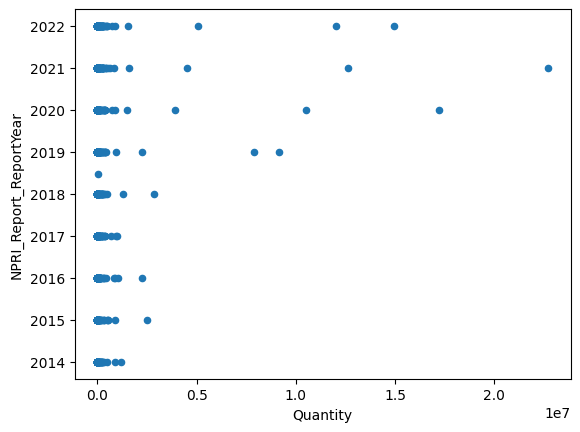

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df3 = df2.plot.scatter(x = 'Quantity',y= 'NPRI_Report_ReportYear')
print(df3)

In [ ]:
df2.describe()

,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,ProvinceEn,Detail_UnitType_NameEn
count,121028.000000,121028.000000,121028.00000,1.210280e+05,121028.00000,121028.000000,121028.000000,121028.000000,121028.000000
mean,484.372558,2215.935205,2018.46778,1.697642e+03,132.88173,3.778795,19.267624,3.455746,3.748182
std,215.505552,1305.781801,2.51933,1.189330e+05,49.56427,1.327019,9.183169,4.316236,0.692829
min,0.000000,0.000000,2014.00000,-2.044561e+04,0.00000,0.000000,0.000000,0.000000,0.000000
25%,292.000000,1100.000000,2016.00000,8.000000e-02,110.00000,4.000000,10.000000,0.000000,4.000000
50%,552.000000,2110.500000,2019.00000,1.301000e+00,144.00000,4.000000,25.000000,1.000000,4.000000
75%,649.000000,3260.000000,2021.00000,2.228250e+01,176.00000,4.000000,25.000000,8.000000,4.000000
max,766.000000,4648.000000,2022.00000,2.270181e+07,199.00000,8.000000,31.000000,13.000000,4.000000


In [ ]:
df2.corr()

,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,ProvinceEn,Detail_UnitType_NameEn
Company name,1.000000,0.215213,0.078042,-0.016447,0.104044,0.073460,0.122041,-0.278920,0.145163
FacilityName,0.215213,1.000000,0.032420,-0.000807,0.055745,0.025248,0.123883,-0.138153,0.106610
NPRI_Report_ReportYear,0.078042,0.032420,1.000000,0.007033,0.101100,0.040785,0.043217,-0.086157,0.064389
Quantity,-0.016447,-0.000807,0.007033,1.000000,-0.023637,-0.009546,0.013016,0.010771,-0.034194
Detail_NPRI_SubstanceInfo_NameEn,0.104044,0.055745,0.101100,-0.023637,1.000000,0.048745,0.090549,-0.087485,0.320368
Group,0.073460,0.025248,0.040785,-0.009546,0.048745,1.000000,-0.084106,-0.056848,0.115225
Category,0.122041,0.123883,0.043217,0.013016,0.090549,-0.084106,1.000000,-0.184205,0.137979
ProvinceEn,-0.278920,-0.138153,-0.086157,0.010771,-0.087485,-0.056848,-0.184205,1.000000,-0.167535
Detail_UnitType_NameEn,0.145163,0.106610,0.064389,-0.034194,0.320368,0.115225,0.137979,-0.167535,1.000000


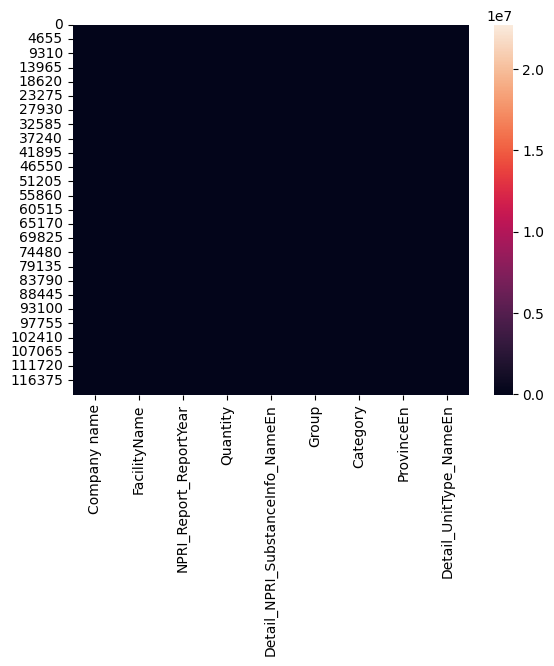

In [ ]:
# Plot the correlation matrix
import seaborn as sns
import plotly.express as px

sns.heatmap(df2)

correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix,
                text_auto=True,
                labels=dict(x="Feature", y="Feature", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                title="Feature Correlation Matrix")

# Update the figure layout to set a specific width and height
fig.update_layout(width=1400, height=1400, autosize=False)

fig.show()


In [ ]:
df2 = df2.copy(deep=True)
df2

,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,ProvinceEn,Detail_UnitType_NameEn
0,0,2681,2021.00000,22.630000,179,4,25,10,4
1,0,2681,2020.00000,16.670000,179,4,25,10,4
2,0,2681,2021.00000,15.940000,54,4,25,10,4
3,0,2681,2020.00000,13.250000,54,4,25,10,4
4,0,2681,2021.00000,12.480000,144,4,25,10,4
...,...,...,...,...,...,...,...,...,...
121023,762,1129,2016.00000,0.000500,176,2,10,1,4
121024,762,2288,2015.00000,0.000500,193,1,19,1,4
121025,762,1129,2016.00000,0.000400,90,2,10,1,4
121026,762,1129,2016.00000,0.000400,32,2,10,1,4


In [ ]:
# Linear regression
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.datasets

df2_iris = sklearn.datasets.load_iris()

In [ ]:
#Define functions
def print_performance_metrics(y_test,y_pred):

  print("Mean squared error:% 0.2f" % mean_squared_error(y_test, y_pred))
  print("R2 score:% 0.2f " % r2_score(y_test, y_pred))
  print("Mean absolute error:% 0.2f" % mean_absolute_error(y_test, y_pred))


In [ ]:
def plot_plot_real_predicted(y_test,y_pred):
  plt.plot(y_test[1:600],color = 'red', label = 'data')
  plt.plot(y_test[1:600],color = 'blue', label = 'predicted data')
  plt.title('Prediction')
  plt.legend()
  # Update the figure layout to set a specific width and height
  #fig.update_layout( autosize=True)

  plt.show()




In [ ]:
#Load the data
import pandas as pd
#datasets =pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for review.csv')
# Load the data
df2 = sklearn.datasets.load_iris()

# Split the data into training and testing sets
X = df2.data
y = df2.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Forcasting without target transformation
# Create linear regression object
regr =linear_model.LinearRegression()

#train the model using the training sets
regr.fit(X_train,y_train)

#Make the prediction using testing sets
y_pred = regr.predict(X_test)

#Evaluate the model and print the performance metrics
print_performance_metrics(y_test,y_pred)

Mean squared error: 0.04
R2 score: 0.95 
Mean absolute error: 0.15


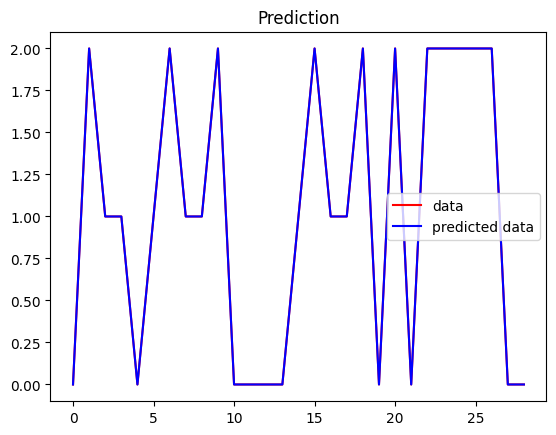

In [ ]:
#plot real and predicted outputs
plot_plot_real_predicted(y_test,y_pred)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df3 = df2.plot.scatter(x = 'Quantity',y= 'NPRI_Report_ReportYear')
print(df3)

"Three different Scalers(MinMaxScaler,StandardScaler,RobustScaler)"
1. 'Normalization =min-max scaling,the vales in a column are converted b/n 0 and 1'.

      value = (x - x_min)/(x_max -x_min)


2. 'Standardisation = z-score normalization,the values in a column are rescaled ot demonstrate the properties of a standard Gaussian distribution,mean =0 and variance =1'.

      z_value = (x -mean)/St.dev

3. 'RobustScaler = interquantile range,it is less susceptible to outliers'

In [ ]:
df2['Quantity'] = df['Quantity'].fillna(df2['Quantity'].mean())


In [ ]:
# Import the necessary
from sklearn.preprocessing import StandardScaler

# Extract the training data
X_train = df.iloc[:, :-1]
#X_test = df.iloc[:, :-1]
non_numerical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(non_numerical_cols)
#Transform data
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
print(X_train)


[]
[[ 1.36041818 -1.72288542 -0.02742836 ... -1.78444577  0.41352074
   0.01046098]
 [ 1.36041818 -1.72288542 -0.02742836 ... -1.78444577  0.41352074
   0.01046098]
 [ 1.36041818 -1.72288542 -0.02742836 ... -1.78444577  0.41352074
   0.01046098]
 ...
 [ 1.71563292 -0.78347407 -0.89927162 ...  0.21172149 -2.5515687
   0.01046098]
 [ 1.71990504 -1.1100663   1.5891096  ...  0.21172149  0.41352074
   0.01046098]
 [ 1.71990504 -1.1100663   1.5891096  ...  0.21172149 -2.5515687
   0.01046098]]


In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

x_train = df.select_dtypes(include=["int64", "float64"])
MinMaxScaler = preprocessing.MinMaxScaler()
print(x_train.shape)

x_train_MinMax = MinMaxScaler.fit_transform(x_train)

print('scaled', x_train_MinMax)

x_train = np.array(df.select_dtypes(include=["int64", "float64"]).columns)
print("scaled",x_train_MinMax)
df.describe()

(537550, 18)
scaled [[0.89598893 0.         0.50202177 ... 0.96605868 0.86666667 0.68318318]
 [0.89598893 0.         0.50202177 ... 0.96605868 0.86666667 0.68318318]
 [0.89598893 0.         0.50202177 ... 0.96605868 0.86666667 0.68318318]
 ...
 [0.99876394 0.26926111 0.26357698 ... 0.00491673 0.86666667 0.49547575]
 [1.         0.1756508  0.94413686 ... 0.96605868 0.86666667 0.49547575]
 [1.         0.1756508  0.94413686 ... 0.00491673 0.86666667 0.49547575]]
scaled [[0.89598893 0.         0.50202177 ... 0.96605868 0.86666667 0.68318318]
 [0.89598893 0.         0.50202177 ... 0.96605868 0.86666667 0.68318318]
 [0.89598893 0.         0.50202177 ... 0.96605868 0.86666667 0.68318318]
 ...
 [0.99876394 0.26926111 0.26357698 ... 0.00491673 0.86666667 0.49547575]
 [1.         0.1756508  0.94413686 ... 0.96605868 0.86666667 0.49547575]
 [1.         0.1756508  0.94413686 ... 0.00491673 0.86666667 0.49547575]]


,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,Longitude,ProvinceEn,Detail_UnitType_NameEn,NAICSPrimary,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022,Number of employees
count,537550.000000,537550.000000,537550.000000,537550.000000,537550.000000,537550.000000,537550.000000,537550.000000,537550.000000,537550.000000,537550.000000,537550.00000,537550.000000,537550.000000,537550.000000,537550.000000,537550.000000,537550.000000
mean,0.502376,1878.021458,8190.586952,0.499664,0.503520,169.133191,160.089780,3.640099,18.002212,0.502986,0.500434,4.69116,2.821656,0.499329,170.969119,5245.853251,12.998800,0.495476
std,0.289332,1090.045328,4396.436573,0.304616,0.287401,79.726162,61.379458,1.534758,9.614516,0.290232,0.287649,4.39819,0.426587,0.287487,85.163283,2043.785101,0.114701,0.288005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249249,841.000000,4457.000000,0.236737,0.257450,108.000000,118.000000,4.000000,8.000000,0.251251,0.252493,0.00000,3.000000,0.251752,109.000000,6091.000000,13.000000,0.250250
50%,0.504385,1700.000000,8060.000000,0.442442,0.506225,210.000000,180.000000,4.000000,25.000000,0.506945,0.501502,4.00000,3.000000,0.495495,189.000000,6091.000000,13.000000,0.493493
75%,0.753777,2876.000000,12249.000000,0.688188,0.755606,239.000000,210.000000,4.000000,25.000000,0.755756,0.748248,8.00000,3.000000,0.750610,236.000000,6091.000000,13.000000,0.748549
max,1.000000,3803.000000,16075.000000,1.000000,1.000000,243.000000,243.000000,7.000000,30.000000,1.000000,1.000000,12.00000,3.000000,1.000000,331.000000,6305.000000,15.000000,1.000000


In [ ]:
# prompt: write a code to download clean csv file from google collab

from google.colab import files

# Write your cleaned data to a CSV file
df.to_csv('cleaned_data.csv', index=False)

# Download the CSV file
files.download('cleaned_data.csv')
